In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_mental = pd.read_csv(r'C:\Users\gdlar\OneDrive\Documents\Project 2\MHCLD_PUF_2018.csv')
df_healthcare = pd.read_csv(r'C:\Users\gdlar\OneDrive\Documents\Project 2\2018_Child_and_Adult_Health_Care_Quality_Measures.csv')
df_poverty = pd.read_csv(r'C:\Users\gdlar\OneDrive\Documents\Project 2\raw_data.csv', skiprows=2)
xls = pd.ExcelFile(r'C:\Users\gdlar\OneDrive\Documents\Project 2\CS5010Project.xlsx') #excel file with codes for df_meantal
df_states_mental = pd.read_excel(xls, 'STATEFIP State Codes') #spreadsheet page with the codes for states df_mental dataframe
df_poverty_percent = pd.read_excel(xls, 'Poverty Rate by State 2018')

In [3]:
df_poverty.head() #data has been read and set up with header by skipping first two rows

,Location,Under 100%,100-199%,200-399%,400%+,Total,Footnotes
0,United States,41644300.0,55181300.0,94387200.0,127285700.0,318498500.0,1.0
1,Alabama,797800.0,938500.0,1479000.0,1537400.0,4752600.0,NaN
2,Alaska,76100.0,103600.0,208900.0,320500.0,709100.0,NaN
3,Arizona,973900.0,1384200.0,2196900.0,2449300.0,7004300.0,NaN
4,Arkansas,508200.0,654800.0,934300.0,824000.0,2921300.0,NaN


In [4]:
df_healthcare.tail()

,State,Domain,Reporting Program,Measure Name,Measure Abbreviation,Rate Definition,FFY,Population,Methodology,State Rate,Number of States Reporting,Median,Bottom Quartile,Top Quartile,Notes,State Specific Comments,Source,Rate Used in Calculating State Mean and Median
2821,Wyoming,Care of Acute and Chronic Conditions,Adult Core Set,PQI 15: Asthma in Younger Adults Admission Rat...,PQI15-AD,Inpatient Hospital Admissions for Asthma per 1...,2018,Medicaid & Dual Eligibles,Administrative,15.9,26,6.8,8.6,4.0,NaN,Rate includes FFS population.,Mathematica analysis of MACPro reports for the...,Yes
2822,Wyoming,Maternal and Perinatal Health,Adult Core Set,Contraceptive Care: Postpartum Women Ages 21-44,CCP-AD,Percentage of Postpartum Women Provided a Most...,2018,Medicaid & Dual Eligibles,Administrative,13.0,29,10.6,7.7,12.8,NaN,Rates include FFS population.,Mathematica analysis of MACPro reports for the...,Yes
2823,Wyoming,Maternal and Perinatal Health,Adult Core Set,Contraceptive Care: Postpartum Women Ages 21-44,CCP-AD,Percentage of Postpartum Women Provided a Most...,2018,Medicaid & Dual Eligibles,Administrative,23.1,29,39.4,32.2,45.7,NaN,Rates include FFS population.,Mathematica analysis of MACPro reports for the...,Yes
2824,Wyoming,Maternal and Perinatal Health,Adult Core Set,Contraceptive Care: Postpartum Women Ages 21-44,CCP-AD,Percentage of Postpartum Women Provided a Long...,2018,Medicaid & Dual Eligibles,Administrative,0.1,29,0.8,0.4,1.9,NaN,Rates include FFS population.,Mathematica analysis of MACPro reports for the...,Yes
2825,Wyoming,Maternal and Perinatal Health,Adult Core Set,Contraceptive Care: Postpartum Women Ages 21-44,CCP-AD,Percentage of Postpartum Women Provided a Long...,2018,Medicaid & Dual Eligibles,Administrative,15.6,29,12.9,8.5,15.3,NaN,Rates include FFS population.,Mathematica analysis of MACPro reports for the...,Yes


In [5]:
df_mental_states = df_mental.merge(df_states_mental, left_on="STATEFIP", right_on="Value")
df_mental_states.tail()

,YEAR,AGE,EDUC,ETHNIC,RACE,GENDER,SPHSERVICE,CMPSERVICE,OPISERVICE,RTCSERVICE,...,PERSONFLG,SCHIZOFLG,ALCSUBFLG,OTHERDISFLG,STATEFIP,DIVISION,REGION,CASEID,Value,State
6213786,2018,12,-9,-9,6,2,2,1,2,2,...,0,0,0,0,99,0,0,20186213787,99,Other Jurisdictions
6213787,2018,7,-9,-9,-9,2,2,1,2,2,...,0,0,0,0,99,0,0,20186213788,99,Other Jurisdictions
6213788,2018,4,-9,-9,2,2,2,1,2,2,...,0,0,0,0,99,0,0,20186213789,99,Other Jurisdictions
6213789,2018,5,-9,-9,6,2,1,1,2,2,...,0,0,0,0,99,0,0,20186213790,99,Other Jurisdictions
6213790,2018,14,2,4,5,1,2,1,2,2,...,0,0,0,0,99,0,0,20186213791,99,Other Jurisdictions


array([[<AxesSubplot:title={'center':'Alabama'}>,
        <AxesSubplot:title={'center':'Arizona'}>,
        <AxesSubplot:title={'center':'Arkansas'}>,
        <AxesSubplot:title={'center':'California'}>,
        <AxesSubplot:title={'center':'Colorado'}>,
        <AxesSubplot:title={'center':'Connecticut'}>,
        <AxesSubplot:title={'center':'Delaware'}>],
       [<AxesSubplot:title={'center':'District of Columbia'}>,
        <AxesSubplot:title={'center':'Florida'}>,
        <AxesSubplot:title={'center':'Hawaii'}>,
        <AxesSubplot:title={'center':'Idaho'}>,
        <AxesSubplot:title={'center':'Illinois'}>,
        <AxesSubplot:title={'center':'Indiana'}>,
        <AxesSubplot:title={'center':'Iowa'}>],
       [<AxesSubplot:title={'center':'Kentucky'}>,
        <AxesSubplot:title={'center':'Louisiana'}>,
        <AxesSubplot:title={'center':'Maryland'}>,
        <AxesSubplot:title={'center':'Massachusetts'}>,
        <AxesSubplot:title={'center':'Michigan'}>,
        <AxesSubplo

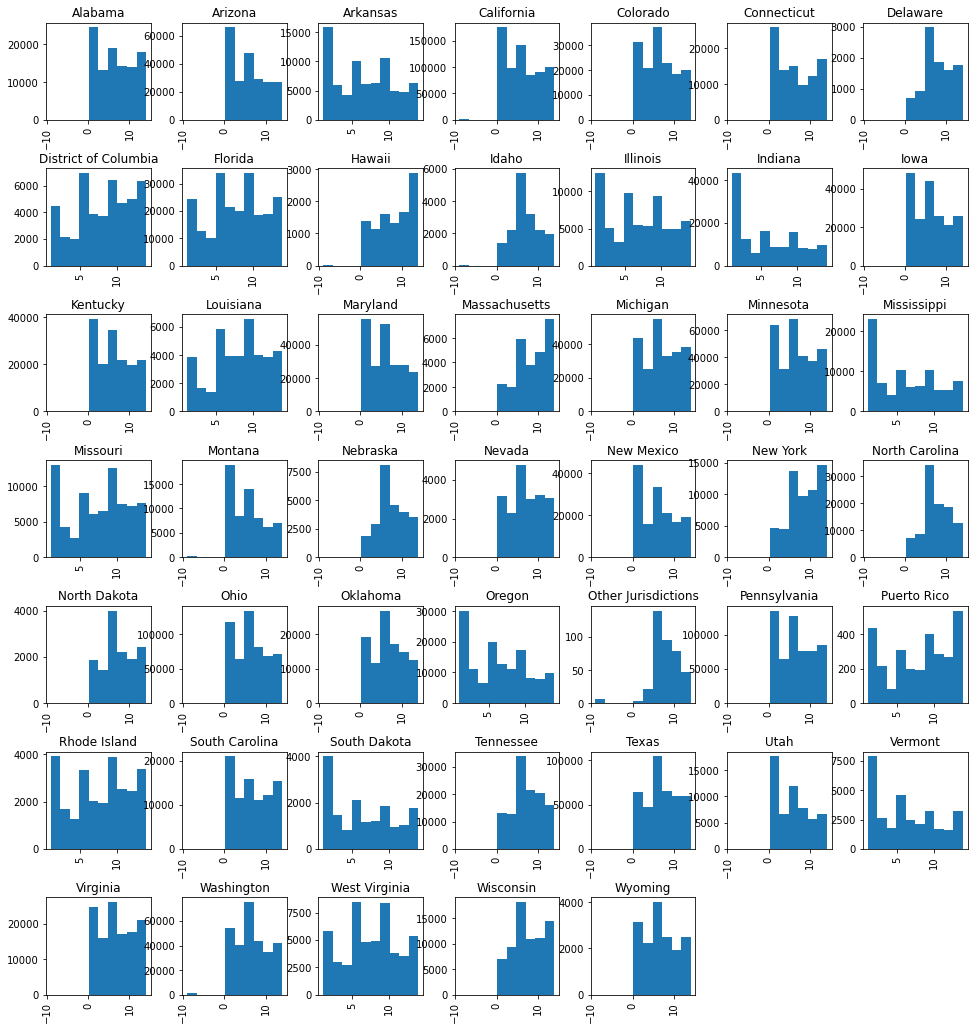

In [6]:
df_mental_states['AGE'].hist(by = df_mental_states['State'], figsize = (16,18))

In [7]:
#create graphs without unknown values - to help see distributions
df_mental_2 = df_mental_states[df_mental_states['STATEFIP'] != 99]
df_mental_2 = df_mental_states[df_mental_states['AGE'] != -9]
df_mental_2.tail()

,YEAR,AGE,EDUC,ETHNIC,RACE,GENDER,SPHSERVICE,CMPSERVICE,OPISERVICE,RTCSERVICE,...,PERSONFLG,SCHIZOFLG,ALCSUBFLG,OTHERDISFLG,STATEFIP,DIVISION,REGION,CASEID,Value,State
6213786,2018,12,-9,-9,6,2,2,1,2,2,...,0,0,0,0,99,0,0,20186213787,99,Other Jurisdictions
6213787,2018,7,-9,-9,-9,2,2,1,2,2,...,0,0,0,0,99,0,0,20186213788,99,Other Jurisdictions
6213788,2018,4,-9,-9,2,2,2,1,2,2,...,0,0,0,0,99,0,0,20186213789,99,Other Jurisdictions
6213789,2018,5,-9,-9,6,2,1,1,2,2,...,0,0,0,0,99,0,0,20186213790,99,Other Jurisdictions
6213790,2018,14,2,4,5,1,2,1,2,2,...,0,0,0,0,99,0,0,20186213791,99,Other Jurisdictions


array([[<AxesSubplot:title={'center':'Alabama'}>,
        <AxesSubplot:title={'center':'Arizona'}>,
        <AxesSubplot:title={'center':'Arkansas'}>,
        <AxesSubplot:title={'center':'California'}>,
        <AxesSubplot:title={'center':'Colorado'}>,
        <AxesSubplot:title={'center':'Connecticut'}>,
        <AxesSubplot:title={'center':'Delaware'}>],
       [<AxesSubplot:title={'center':'District of Columbia'}>,
        <AxesSubplot:title={'center':'Florida'}>,
        <AxesSubplot:title={'center':'Hawaii'}>,
        <AxesSubplot:title={'center':'Idaho'}>,
        <AxesSubplot:title={'center':'Illinois'}>,
        <AxesSubplot:title={'center':'Indiana'}>,
        <AxesSubplot:title={'center':'Iowa'}>],
       [<AxesSubplot:title={'center':'Kentucky'}>,
        <AxesSubplot:title={'center':'Louisiana'}>,
        <AxesSubplot:title={'center':'Maryland'}>,
        <AxesSubplot:title={'center':'Massachusetts'}>,
        <AxesSubplot:title={'center':'Michigan'}>,
        <AxesSubplo

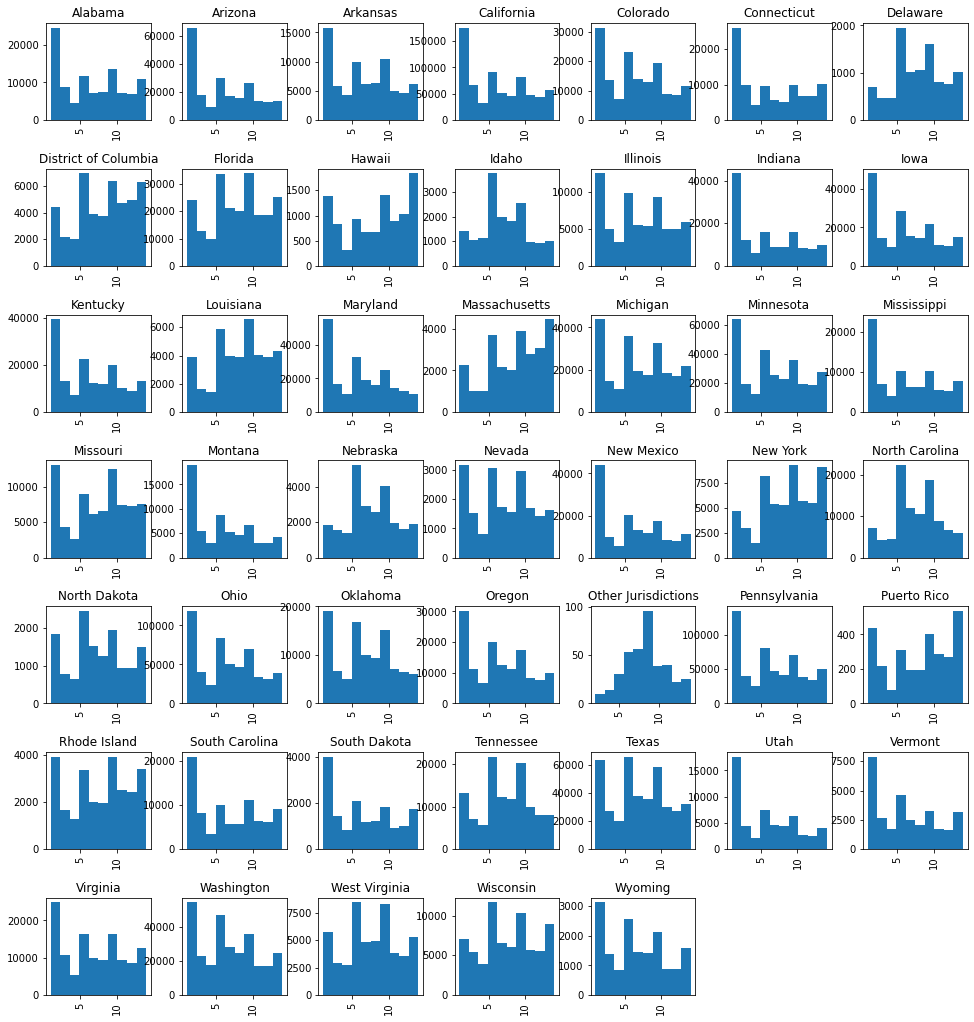

In [8]:
#create graphs without unknown values - to help see distributions
df_mental_2['AGE'].hist(by = df_mental_2['State'], figsize = (16,18))

In [9]:
df_poverty_edit = df_poverty[1:-8]
df_poverty_edit.head(10)

,Location,Under 100%,100-199%,200-399%,400%+,Total,Footnotes
1,Alabama,797800.0,938500.0,1479000.0,1537400.0,4752600.0,NaN
2,Alaska,76100.0,103600.0,208900.0,320500.0,709100.0,NaN
3,Arizona,973900.0,1384200.0,2196900.0,2449300.0,7004300.0,NaN
4,Arkansas,508200.0,654800.0,934300.0,824000.0,2921300.0,NaN
5,California,4940800.0,6603400.0,10648200.0,16553400.0,38745900.0,NaN
6,Colorado,541700.0,832800.0,1640000.0,2540600.0,5555200.0,NaN
7,Connecticut,358600.0,460200.0,813100.0,1834500.0,3466300.0,NaN
8,Delaware,110600.0,145400.0,268800.0,412900.0,937700.0,NaN
9,District of Columbia,111000.0,72200.0,124500.0,360200.0,667900.0,NaN
10,Florida,2791200.0,4124100.0,6709200.0,7219000.0,20843500.0,NaN


<AxesSubplot:xlabel='Location'>

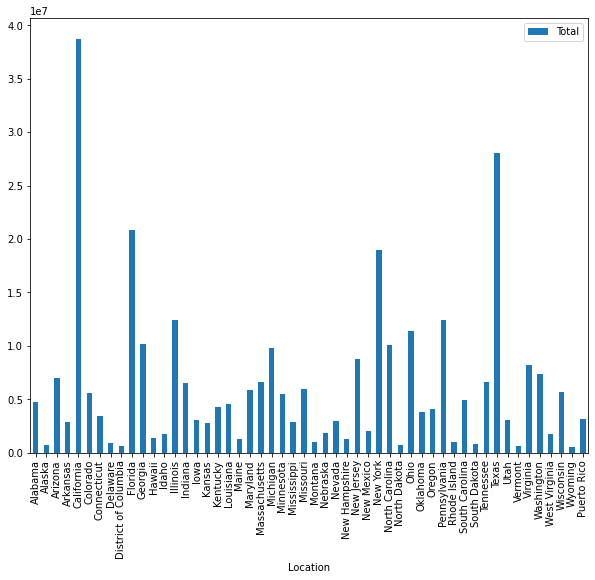

In [10]:
#Total people in poverty per state
#might be better to look at percent poverty
df_poverty_edit.plot(x = 'Location', y = 'Total', kind = 'bar', figsize = (10,8))

In [11]:
df_poverty_percent.head()

,"Poverty rate by state, 2018",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,From https://www.epi.org/blog/poverty-continue...,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,State,"Change in poverty rate, 2000 to 2018",Change 2007 to 2018,"Change in poverty rate, 2017 to 2018",2018 poverty rate relative to national average,"Poverty rate, 2018"
3,Alabama,0.012,-0.001,-0.001,0.037,0.168
4,Alaska,0.018,0.02,-0.002,-0.022,0.109


In [12]:
df_statecounts = df_mental_2['State'].value_counts().to_frame()
df_statecounts.reset_index(inplace=True)
df_statecounts.columns = ['State', 'mental_health_cases']

In [13]:
df_poverty_percent1 = df_poverty_percent[3:-2]
df_poverty_percent1.columns = ['State','Change in poverty rate, 2000 to 2018', 'Change 2007 to 2018', 'Change in poverty rate, 2017 to 2018', '2018 poverty rate relative to national average', 'Poverty rate 2018']
df_poverty_percent1['State'] = df_poverty_percent1['State'].str.strip()
df_poverty_percent1.head()
# #df_poverty_percent1['State'].head()
# print(df_statecounts.head())
# print('*******************************************************')
# new = df_statecounts['State'][0]
# print(repr(new))
# print(df_poverty_percent1.columns)
# blue = df_poverty_percent1['State'][3]
# #                           'Poverty rate by state, 2018'
# print(repr(blue))
# print('*******************************************************')
df_poverty_percent2 = df_poverty_percent1.merge(df_statecounts, on="State")

# print('*******************************************************')
df_poverty_percent2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 43
Data columns (total 7 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   State                                           44 non-null     object
 1   Change in poverty rate, 2000 to 2018            44 non-null     object
 2   Change 2007 to 2018                             44 non-null     object
 3   Change in poverty rate, 2017 to 2018            44 non-null     object
 4   2018 poverty rate relative to national average  44 non-null     object
 5   Poverty rate 2018                               44 non-null     object
 6   mental_health_cases                             44 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 2.8+ KB


<ipython-input-13-fc6d27e4517e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_poverty_percent1['State'] = df_poverty_percent1['State'].str.strip()


In [14]:
df_poverty_percent2.head()

,State,"Change in poverty rate, 2000 to 2018",Change 2007 to 2018,"Change in poverty rate, 2017 to 2018",2018 poverty rate relative to national average,Poverty rate 2018,mental_health_cases
0,Alabama,0.012,-0.001,-0.001,0.037,0.168,102416
1,Arizona,-0.016,-0.002,-0.009,0.009,0.14,224769
2,Arkansas,0.002,-0.007,0.008,0.041,0.172,74888
3,California,-0.009,0.004,-0.005,-0.003,0.128,691136
4,Colorado,0.009,-0.024,-0.007,-0.035,0.096,150557


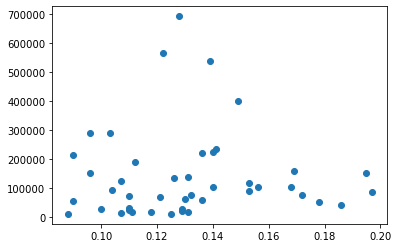

In [18]:
plt.scatter(df_poverty_percent2['Poverty rate 2018'], df_poverty_percent2['mental_health_cases'])